<a href="https://colab.research.google.com/github/auramolina/Analitica-en-recursos-humanos/blob/main/Modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='0C2054'><b>Librerías

In [66]:
#### Cargar paquetes
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

import joblib  ### para guardar modelos
import openpyxl
import sys
import os

In [67]:
## Conectar el drive
from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/AA/Analitica-en-recursos-humanos'
os.chdir(path) ### setting a Working directory on drive path
sys.path.append(path+'/')  ###setting path to read user defined functions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import funciones_jc as fn ### importar modulo de  funciones
from funciones_jc import * ### importar toddas llas funciones del archivo

## con esto ya ses pueden utilizar todas las funciones propias

In [69]:
d2015 = pd.read_csv('https://raw.githubusercontent.com/auramolina/Analitica-en-recursos-humanos/main/Datos/dummies2015')
d2015

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,0,1,131160,1.0,11,0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,31,10,1,0,1,41890,0.0,23,1,6.0,...,False,False,False,False,True,False,False,False,False,True
2,32,17,4,1,4,193280,1.0,15,3,5.0,...,False,False,False,False,False,True,False,False,True,False
3,38,2,5,1,3,83210,3.0,11,3,13.0,...,False,False,False,False,False,False,False,False,True,False
4,32,10,1,1,1,23420,4.0,12,2,9.0,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,0,1,60290,3.0,17,1,10.0,...,False,False,False,False,True,False,False,False,False,True
4406,29,2,4,1,1,26790,2.0,15,0,10.0,...,True,False,False,False,False,False,False,True,False,False
4407,25,25,2,1,2,37020,0.0,20,0,5.0,...,False,False,False,False,False,True,False,False,True,False
4408,42,18,2,1,1,23980,0.0,14,1,10.0,...,True,False,False,False,False,False,False,True,False,False


#<font color='0C2054'><b> Separación variables

In [70]:
### Variable respuesta
y = d2015['Attrition']

## Variables explicativas
X1 = d2015.loc[:,~d2015.columns.isin(['Attrition'])]

## <font color='0C2054'>Estandarización

In [71]:
## Estandarización y escalado de los datos
scaler = StandardScaler()
scaler.fit(X1)
X2 = scaler.transform(X1)
X = pd.DataFrame(X2,columns=X1.columns)

In [72]:
X2

array([[ 1.54136892, -0.39393818, -0.89168825, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.64866811,  0.09963874, -1.86842575, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [-0.53916626,  0.96339837,  1.06178675, ..., -0.53487311,
         1.08823234, -0.68556546],
       ...,
       [-1.30567922,  1.95055222, -0.89168825, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.55585225,  1.0867926 , -0.89168825, ...,  1.86960232,
        -0.91892141, -0.68556546],
       [ 0.33684855,  2.32073492,  0.08504925, ...,  1.86960232,
        -0.91892141, -0.68556546]])

# <font color='0C2054'><b>Modelos Iniciales</font></b>

* Gradient boosting: es útil debido a su capacidad para manejar datos desbalanceados al enfocarse en los casos difíciles de predecir, como los empleados que renuncian.
* Bosques aleatorios: se selecciona RFC por su rendimiento, que generalmente es bueno, dando resultados satisfactorios, también porque es bueno en modelos que tienen muchas variables categóricas.
* DecisionTree:los árboles de decisión son una herramienta versátil y fácil de interpretar que puede ser útil en una amplia variedad de problemas de aprendizaje automático.

In [73]:
m_lr = LogisticRegression()
m_rf = RandomForestClassifier()
m_tr = DecisionTreeClassifier()
m_gbt = GradientBoostingClassifier()

In [74]:
modelos = list([m_lr, m_rf,m_gbt,m_tr])

## <font color='0C2054'>Selección de variables

Con el objetivo de identificar las características más relevantes que influyen en la rotación de empleados se utilizo SelectFromModel lo que hizo que se pasaran de 43 variables explicativas a 13

In [75]:
var_names = fn.sel_variables(modelos, X, y, threshold = "2*mean")
var_names.shape

(13,)

In [76]:
X2 = X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               4410 non-null   float64
 1   BusinessTravel_Travel_Frequently  4410 non-null   float64
 2   DistanceFromHome                  4410 non-null   float64
 3   EnvironmentSatisfaction           4410 non-null   float64
 4   JobSatisfaction                   4410 non-null   float64
 5   MaritalStatus_Single              4410 non-null   float64
 6   MonthlyIncome                     4410 non-null   float64
 7   NumCompaniesWorked                4410 non-null   float64
 8   PercentSalaryHike                 4410 non-null   float64
 9   TotalWorkingYears                 4410 non-null   float64
 10  YearsAtCompany                    4410 non-null   float64
 11  YearsSinceLastPromotion           4410 non-null   float64
 12  YearsW

# <font color='0C2054'><b>Modelado



## <font color='0C2054'>Calculo F1-score

Si bien lo que se busca con el calculo del F1-score son aquellos modelos que nos ofrescan puntajes altos hay que tener encuenta criterios como:

* Capacidad de manejar desbalance de clases: Estos modelos pueden manejar de forma efectiva el desbalance de clases a través de técnicas como el ajuste de los pesos de clase o el uso de bosques aleatorios con muestreo bootstrap.

* Precisión y exhaustividad: Se busca un modelo que minimice tanto los falsos positivos como los falsos negativos.

* Eficiencia: El modelo debe ser computacionalmente eficiente para su implementación en un entorno real.

* Ser robusto: Generalizar bien a nuevos datos y ser resistente a cambios en la distribución de los datos.

Los modelos Random Forest y Decision Tree han demostrado cumplir con la mayoria de estas caracteristias ademas se opto por la implemntacion de un modelo de gradiant boosting para hacer una comparacion entre los rendimientos que los modelos nos ofrece.


In [77]:
# Calcular F1-score con 30 iteraciones para todos los modelos con todas las variables
f1score_df = fn.medir_modelos(modelos, "f1", X, y, 30)
# Calcular F1-score con 30 iteraciones para todos los modelos con variables seleccionadas
f1_score_varsel = fn.medir_modelos(modelos, "f1", X2, y, 30)
# visualizar los resultados de f1- score para los modelos con todas las variabels y con las variables seleccionadas
f1=pd.concat([f1score_df,f1_score_varsel],axis=1)
f1.columns=['rl', 'tr', 'rf', 'gb', 'rl_Sel', 'tr_sel', 'rf_sel', 'gb_Sel']
f1

,rl,tr,rf,gb,rl_Sel,tr_sel,rf_sel,gb_Sel
0,0.370370,0.975610,0.625000,0.975610,0.250000,0.975610,0.482759,0.975610
1,0.320000,1.000000,0.580645,1.000000,0.320000,1.000000,0.562500,1.000000
2,0.230769,1.000000,0.482759,0.975610,0.086957,1.000000,0.413793,0.975610
3,0.230769,1.000000,0.645161,1.000000,0.250000,1.000000,0.500000,1.000000
4,0.086957,1.000000,0.173913,1.000000,0.090909,1.000000,0.444444,1.000000
5,0.074074,1.000000,0.600000,1.000000,0.240000,1.000000,0.482759,1.000000
6,0.320000,1.000000,0.687500,1.000000,0.320000,1.000000,0.727273,1.000000
7,0.240000,1.000000,0.600000,1.000000,0.173913,1.000000,0.384615,1.000000
8,0.214286,0.600000,0.370370,0.551724,0.086957,0.800000,0.384615,0.551724
9,0.083333,0.173913,0.090909,0.000000,0.000000,0.551724,0.240000,0.000000


In [78]:
# promedio de la metrica F1-score para todos los modelos con todas las variables y con las variables seleccionadas
f1.mean()

,0
rl,0.212993
tr,0.846977
rf,0.467928
gb,0.790158
rl_Sel,0.190291
tr_sel,0.853219
rf_sel,0.445383
gb_Sel,0.790158


## <font color='0C2054'>Grilla de hiperparametros para el modelo Ramdon Forest

In [79]:
param_grid_rf = {
    'n_estimators': [5, 50, 100, 200, 500],  # Número de árboles en el bosque
    'max_features': [5, 20],  # Número de características a considerar en cada división
    'max_depth': [10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [5, 20, 100],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para estar en un nodo hoja
    'bootstrap': [True, False]  # Método de muestreo para construir árboles
}

## <font color='0C2054'>Grilla de hiperparametros para el Decision Tree

In [80]:
# Grilla de hiperparametros para el modelo Decision Tree
param_grid_tr = {
    'criterion': ['gini', 'entropy'],  # Criterios para la división de nodos
    'max_depth': [5, 10, 15],     # Profundidad máxima del árbol
    'min_samples_split': [5, 20, 100 ],    # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],      # Número mínimo de muestras requeridas en un nodo hoja
    'max_features': [5, 20],  # Número máximo de características a considerar en cada división
    'class_weight': [None, 'balanced']  # Peso de las clases para abordar el desbalance de clases
}

## <font color='0C2054'>Grilla de hiperparámetros para Gradient Boosting

In [81]:
param_grid_gb = {
    'n_estimators': [100, 200, 500],  # Número de árboles en el ensemble
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Tasa de aprendizaje
    'max_depth': [3, 5, 8],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras necesarias en un nodo hoja
    'subsample': [0.8, 0.9, 1.0],  # Fracción de muestras utilizadas para entrenar cada árbol
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características a considerar al hacer cada división
}

## <font color='0C2054'>Técnica de búsqueda de hiperparámetros para el modelo Ramdon Forest

In [82]:
tun_rf = RandomizedSearchCV(m_rf,param_distributions=param_grid_rf,n_iter=10,scoring="f1")
tun_rf.fit(X2,y)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': [5, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 20, 100],
                                        'n_estimators': [5, 50, 100, 200, 500]},
                   scoring='f1')

In [83]:
# Imprimir los parametros de la grilla con el mejor puntaje
pd.set_option('display.max_colwidth', 100)
resultados=tun_rf.cv_results_
tun_rf.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
4,"{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 20, 'max_dep...",0.846796
5,"{'n_estimators': 5, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth...",0.726048
6,"{'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 5, 'max_de...",0.647922
8,"{'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 20, 'max_d...",0.589673
7,"{'n_estimators': 5, 'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 5, 'max_dep...",0.331699
2,"{'n_estimators': 5, 'min_samples_split': 100, 'min_samples_leaf': 4, 'max_features': 20, 'max_de...",0.270517
3,"{'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 4, 'max_features': 20, 'max_...",0.250732
1,"{'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 4, 'max_features': 20, 'max_...",0.250578
0,"{'n_estimators': 500, 'min_samples_split': 100, 'min_samples_leaf': 1, 'max_features': 5, 'max_d...",0.213069
9,"{'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 5, 'max_d...",0.205443


## <font color='0C2054'>Técnica de búsqueda de hiperparámetros para el modelo Decision Tree

In [84]:
# Crear la instancia de GridSearchCV para búsqueda de hiperparámetros
tun_tr = GridSearchCV(m_tr, param_grid=param_grid_tr, scoring='f1', cv=5)
# Realizar la búsqueda de hiperparámetros en los datos
tun_tr.fit(X2, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15], 'max_features': [5, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 20, 100]},
             scoring='f1')

In [85]:
# Imprimir los parametros de la grilla con el mejor puntaje
pd.set_option('display.max_colwidth', 100)
resultados=tun_tr.cv_results_
tun_tr.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)


,params,mean_test_score
156,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samp...",0.910705
153,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 20, 'min_samp...",0.909961
147,"{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 15, 'max_features': 5, 'min_sampl...",0.886479
210,"{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 20, 'min_s...",0.873803
207,"{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 20, 'min_s...",0.872999
...,...,...
56,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.264470
60,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.253738
2,"{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf...",0.246341
62,"{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_l...",0.238903


## <font color='0C2054'>Técnica de búsqueda de hiperparámetros para el GradientBoostingClassifier

In [86]:
#GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingClassifier

gboos = GradientBoostingClassifier(n_estimators = 100, random_state = 28)

gboos.fit(X2,y)

GradientBoostingClassifier(random_state=28)

In [87]:
tun_gbt = RandomizedSearchCV(m_gbt,param_distributions=param_grid_gb,n_iter=10,scoring="f1")
tun_gbt.fit(X2,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='f1')

In [88]:
# Imprimir los parametros de la grilla con el mejor puntaje
pd.set_option('display.max_colwidth', 100)
resultados=tun_gbt.cv_results_
tun_gbt.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
2,"{'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_fea...",0.902319
4,"{'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_feat...",0.893960
5,"{'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_fea...",0.875173
1,"{'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_feat...",0.856767
0,"{'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_feat...",0.453862
3,"{'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_feat...",NaN
6,"{'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_feat...",NaN
7,"{'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_feat...",NaN
8,"{'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_feat...",NaN
9,"{'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_feat...",NaN


In [89]:
# Mejor grilla del modelo GradientBoostingClassifier
gb_final = tun_gbt.best_estimator_

# Guardar el modelo con hyperparameter tunning
rf_final = tun_rf.best_estimator_

# Mejor grilla del modelo Decision Tree
tr_final = tun_tr.best_estimator_



# <font color='0C2054'><b>Analisis del los modelos

In [90]:
#####Evaluar métrica de entrenamiento y evaluación para mirar sobre ajuste ####
eval_gb=cross_validate(gb_final,X2,y,cv=30,scoring="f1",return_train_score=True)
eval_rf=cross_validate(rf_final,X2,y,cv=30,scoring="f1",return_train_score=True)
eval_tr=cross_validate(tr_final,X2,y,cv=30,scoring="f1",return_train_score=True)



In [91]:
# ### convertir resultado de evaluacion entrenamiento y evaluacion en data frame
# para Ramdon Forest
train_rf=pd.DataFrame(eval_rf['train_score'])
test_rf=pd.DataFrame(eval_rf['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']
train_test_rf

,train_score,test_score
0,0.952018,0.975610
1,0.948816,0.975610
2,0.952018,0.975610
3,0.949618,1.000000
4,0.951294,0.975610
5,0.952091,1.000000
6,0.950495,1.000000
7,0.952091,0.975610
8,0.951125,0.551724
9,0.948859,0.000000


In [92]:
#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para Ramdon Forest
train_gb=pd.DataFrame(eval_gb['train_score'])
test_gb=pd.DataFrame(eval_gb['test_score'])
train_test_gb=pd.concat([train_gb, test_gb],axis=1)
train_test_gb.columns=['train_score','test_score']
train_test_gb

,train_score,test_score
0,0.953683,0.975610
1,0.953753,1.000000
2,0.953753,1.000000
3,0.953753,1.000000
4,0.953753,1.000000
5,0.953753,1.000000
6,0.953753,1.000000
7,0.953753,1.000000
8,0.953257,0.833333
9,0.953917,0.727273


In [93]:
train_tr=pd.DataFrame(eval_tr['train_score'])
test_tr=pd.DataFrame(eval_tr['test_score'])
train_test_tr=pd.concat([train_tr, test_tr],axis=1)
train_test_tr.columns=['train_score','test_score']
train_test_tr

,train_score,test_score
0,0.893466,0.851064
1,0.897842,0.909091
2,0.919355,0.888889
3,0.925461,0.976744
4,0.905036,0.893617
5,0.910675,0.875000
6,0.910275,0.913043
7,0.886219,0.857143
8,0.906318,0.913043
9,0.929786,0.954545


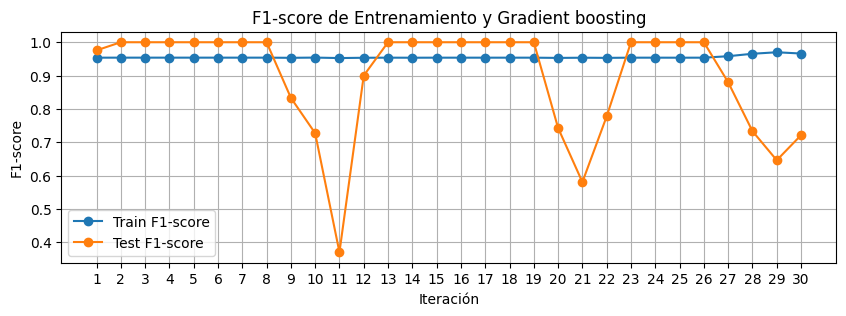

In [94]:
# Número de iteraciones
iterations = range(1, len(train_test_gb) + 1)

# Crear el gráfico de líneas para ver si hay o no sobreajuste
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_gb['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_gb['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Gradient boosting')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

En la línea azul, se obseva el F1-score de entrenamiento, se observa que se mantiene consistentemente cerca de 1.0, lo que sugiere que el modelo ajusta muy bien los datos de entrenamiento, lo cual podría indicar sobreajuste. En contraste, la línea naranja, que representa el F1-score de prueba, muestra fluctuaciones significativas, con caídas pronunciadas en ciertas iteraciones (especialmente alrededor de las iteraciones 11, 21 y 29). Estas caídas indican que el rendimiento del modelo en datos de prueba no es estable, lo que sugiere que el modelo no generaliza bien a los datos no vistos en ciertos puntos, posiblemente debido a un sobreajuste o a la sensibilidad del modelo a ciertos subconjuntos de datos de prueba.

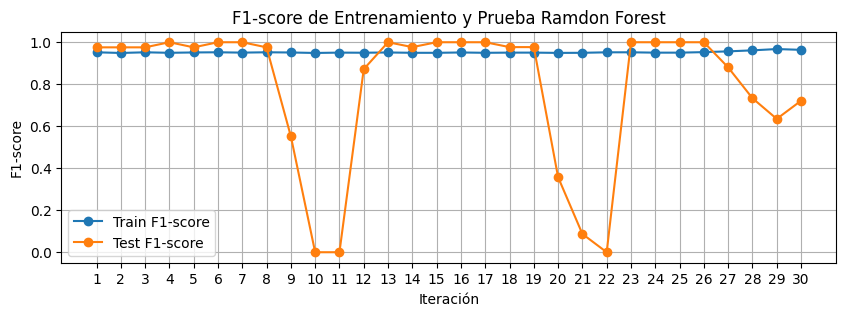

In [95]:
# Número de iteraciones
iterations = range(1, len(train_test_rf) + 1)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_rf['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_rf['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Prueba Ramdon Forest')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

El F1-score de entrenamiento se mantiene constante alrededor de 1.0, lo que indica un rendimiento muy ajustado sobre los datos de entrenamiento. Sin embargo, el F1-score de prueba fluctúa mucho, con caídas pronunciadas en varias iteraciones (como entre la 10 y la 14 y la 20 y 23), lo que sugiere un sobreajuste. En algunas iteraciones, el modelo casi no generaliza bien sobre los datos de prueba, resultando en F1-scores cercanos a 0.

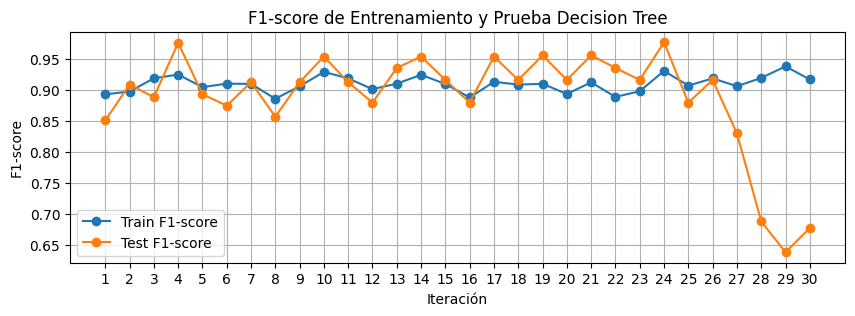

In [96]:
# Número de iteraciones
iterations = range(1, len(train_test_tr) + 1)

# Crear el gráfico de líneas para ver si hay o no sobreajuste
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_tr['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_tr['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Prueba Decision Tree')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

Para el modelo de Decision Tree Durante las primeras iteraciones, ambos F1-scores (entrenamiento y prueba) se mantienen bastante cercanos, oscilando entre 0.85 y 0.95, lo que indica un buen ajuste. Sin embargo, a partir de la iteración 27, el F1-score de prueba cae drásticamente mientras que el de entrenamiento se mantiene estable. Esto sugiere que el modelo comienza a sobreajustarse, perdiendo capacidad de generalización sobre los datos de prueba.

In [97]:
train_test_gb["test_score"].mean()

0.8962888307965418

In [98]:
train_test_rf["test_score"].mean()

0.7881821723633013

In [99]:
train_test_tr["test_score"].mean()

0.8891034140381504

In [100]:
# separar datos de train y test
x_train,x_test,y_train,y_test = train_test_split(X2,y,shuffle = True,test_size=0.30, random_state=123)

In [101]:
y_pred_train_gb = gb_final.predict(x_train) # guardar la predicción para train
y_pred_test_gb = gb_final.predict(x_test) # guardar la predicción para

[[1122   25]
 [   0  176]]


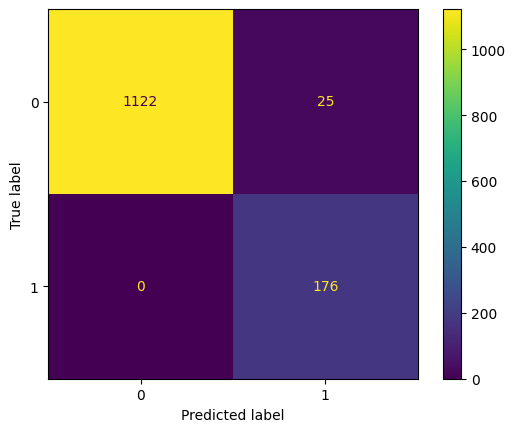

In [102]:
# Matriz de confusión:
cm = confusion_matrix(y_test, y_pred_test_gb, labels=gb_final.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gb_final.classes_)
disp.plot();
print(cm)

In [103]:
y_pred_train_tr = tr_final.predict(x_train)
y_pred_test_tr = tr_final.predict(x_test)

[[1101   46]
 [   1  175]]


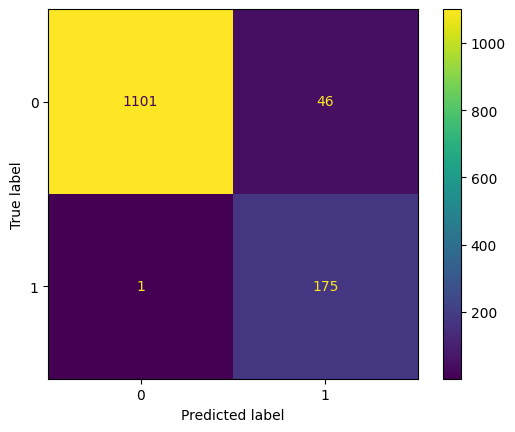

In [104]:
# Matriz de confusión:
cm = confusion_matrix(y_test, y_pred_test_tr, labels=tr_final.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tr_final.classes_)
disp.plot();
print(cm)

Al analizar la matriz de confusion podemos observar que hay al rededor de 1101 datos en la clase 0 es decir en la casilla de los verdaderos negativos. Cometio 46 errores al precidir la clase 1 cuando la clase verdadera era la 0 es decir falsos positivos, sin embargo se puede decir que es una cantida pequeña en comparacion a los que se clasificarion bien.

Para la clases positivas de la clase 1 es decir los verdaderos positivo se 175 predicciones correctas y finalmente fallo una sola vez prediciendo la clase
0 cuando era la 1 lo que indica los falsos negativos
Verdaderos positivos y Verdaderos

La precisión es alta porque hay pocos falsos positivos, y la exhaustividad también lo es, dado que hay pocos falsos negativos. En este contexto, es crucial reducir los falsos positivos para evitar inversiones en empleados que podrían dejar la empresa, pero sin descuidar la retención del talento. Esto sugiere la necesidad de un enfoque equilibrado en la gestión de recursos humanos para minimizar la rotación y mantener a empleados valiosos.

In [105]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f"Accuracy test: {accuracy_score(y_test, y_pred_test_gb)}")
print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion (Sensibilidad)): {TP/(TP+FN)}')
print(f'F1-score:', f1_score(y_test, y_pred_test_gb, average='binary'))
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy test: 0.981103552532124
Precicion: 0.9990925589836661
Recuperacion (Sensibilidad)): 0.959895379250218
F1-score: 0.9336870026525199
Especificidad: 0.9943181818181818


In [106]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f"Accuracy test: {accuracy_score(y_test, y_pred_test_tr)}")
print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion (Sensibilidad)): {TP/(TP+FN)}')
print(f'F1-score:', f1_score(y_test, y_pred_test_tr, average='binary'))
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy test: 0.9644746787603931
Precicion: 0.9990925589836661
Recuperacion (Sensibilidad)): 0.959895379250218
F1-score: 0.8816120906801007
Especificidad: 0.9943181818181818



El modelo tiene un buen desempeño con una accuracy del 96.45%, lo que indica un alto porcentaje de predicciones correctas. La precisión es del 99.91%, lo que refleja que la mayoría de las predicciones positivas son acertadas. La sensibilidad es del 95.99%, mostrando que el modelo detecta correctamente la mayoría de los casos positivos reales. El F1-score es de 88.16%, lo que refleja un buen equilibrio entre precisión y sensibilidad, útil en casos de desequilibrio de clases. La especificidad es del 99.43%, lo que indica que el modelo es eficaz en evitar falsos positivos.

In [107]:
# Asegúrate de que las columnas del DataFrame coincidan con las del entrenamiento
entrenamiento_columnas = gb_final.feature_names_in_

# Asegurarte de que las columnas de X2 coincidan con las del entrenamiento
for col in entrenamiento_columnas:
    if col not in X2.columns:
        X2[col] = 0  # Agregar la columna faltante con valor 0

# Ordenar las columnas para que coincidan con las del entrenamiento
X2 = X2[entrenamiento_columnas]

##### Mirar importancia de variables para tomar acciones ###
pd.set_option('display.max_rows', 100)

# Obtener la importancia de las variables
importancia1 = pd.DataFrame(entrenamiento_columnas, columns=["variable"])
importancia2 = pd.DataFrame(gb_final.feature_importances_, columns=["peso"])

# Combinar los DataFrames para mostrar la importancia de las variables
importancia = pd.concat([importancia1, importancia2], axis=1)
importancia = importancia.sort_values(by=["peso"], ascending=False)

# Exportar la importancia de las variables a un archivo Excel
importancia.to_excel("/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/variables_importances.xlsx")

# Hacer una predicción para el índice 0 en X2
prediccion = gb_final.predict(X2[X2.index == 0])
print(prediccion)

[0]


In [108]:
##### Mirar importancia de variables para tomar acciones ###
pd.set_option('display.max_rows', 100)
importancia1=pd.DataFrame(gb_final.feature_names_in_)
importancia2=pd.DataFrame(gb_final.feature_importances_)
importancia=pd.concat([importancia1,importancia2],axis=1)
importancia.columns=["variable","peso"]
importancia.sort_values('peso')

importancia.sort_values(by=["peso"], ascending=False)
importancia.to_excel("/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/variables_importances.xlsx")
gb_final.predict(X2[X2.index==0])

array([0])

In [109]:
### función para exportar y guardar objetos de python (cualquiera)
# joblib.dump(rf_final, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/rf_final.pkl") ## modelo ramdon forest
joblib.dump(gb_final, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/gb_final.pkl")
joblib.dump(tr_final, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/tr_final.pkl") ## modelo gradient boosting
joblib.dump(var_names, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/var_names.pkl")  ### para variables con que se entrena modelo
joblib.dump(scaler, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/scaler.pkl") ##


['/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/scaler.pkl']